# Chargement des données

In [0]:
# On importe les librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
#On importe le dataset global en précisant qu'il s'agit de time series (squeeze = True)

df = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 index_col=0, 
                 squeeze=True)
df.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
GOLD_Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,16589132426,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,16887922522,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,16496129470,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,16634910472,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,16193326033,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


# Exploration des données

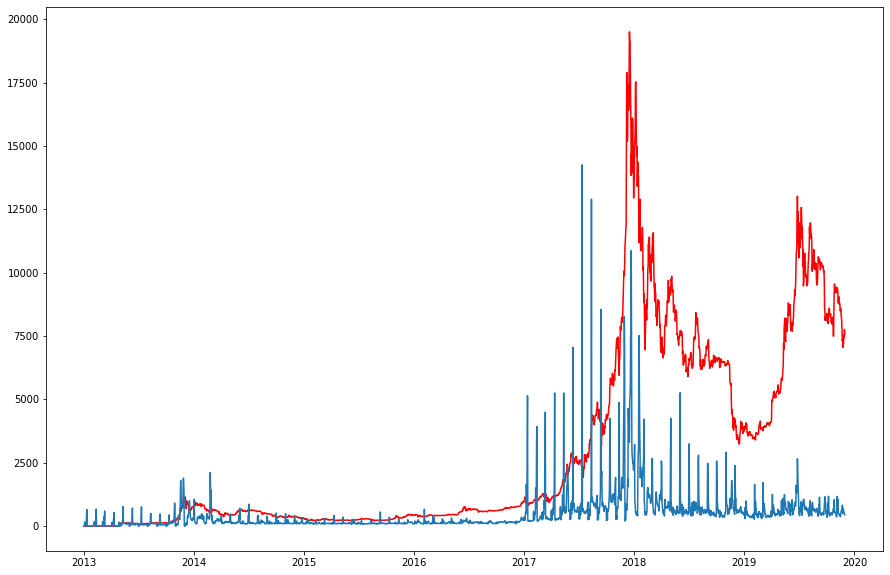

In [0]:
# On affiche Google Trends et le cours du Bitcoin BTC_Close sur le même graphique

plt.figure(figsize=(15,10))
plt.plot(df.BTC_Close, color='r')
plt.plot(df.GGTrends_values*50)
plt.show()

In [0]:
# On affiche les corrélations les plus grandes en valeur absolues

(df.corr()['GGTrends_values']).sort_values(ascending=False)[:20]
# On constate la grande corrélation entre les différents Altcoins et les recherches Google avec le BTC_Close

GGTrends_values    1.000000
BCH_Intraday       0.560564
LTC_Intraday       0.549258
BCH_High           0.549146
BTC_Intraday       0.541021
LTC_High           0.538588
BCH_Close          0.538235
BCH_Market_Cap     0.537260
BCH_Open           0.536933
LTC_Open           0.533697
LTC_Close          0.530479
BCH_Low            0.521463
LTC_Market_Cap     0.519320
LTC_Low            0.515958
ETH_Intraday       0.505709
BTC_High           0.505557
BTC_Open           0.500816
ETH_Market_Cap     0.499351
BTC_Close          0.496963
BTC_Low            0.489511
Name: GGTrends_values, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


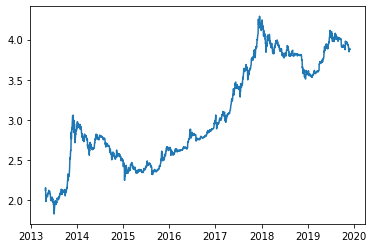

In [0]:
# On affiche le log10 du BTC_Close pour explorer les données
plt.plot(np.log10(df.BTC_Close))

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


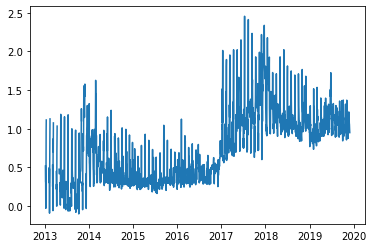

In [0]:
# On affiche également le log10 de Google Trends
plt.plot(np.log10(df.GGTrends_values))

# Préparation des données (Preprocessing)

In [0]:
def min_max_scaler(df, excluded=[]):
  transformed_data = pd.DataFrame()
  df_saved = df

  excluded.extend(['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin'])

  df_dropped = df.drop(excluded, axis=1)
  df_scaled = (df_dropped - df_dropped.min()) / (df_dropped.max() - df_dropped.min())

  # df_dropped_array = np.array(df_dropped)
  # transformed_data = pd.DataFrame(scaler.fit_transform(df_dropped_array), columns=df_dropped.columns, index=df.Date)

  for col in excluded:
    df_scaled[col] = df_saved[col]

  return df_scaled

In [0]:
# On définit une fonction qui récupère pour chaque ligne (date) les nb_day valeurs passées avec un décalage de nb_decal
# et réplique les colonnes val_exp (valeurs explicatives), chacune dans une nouvelle colonne et les juxtapose au colonnes
# contenues dans val_pred qui restent inchangées et non décalées. Cette fonction renvoie un nouveau DataFrame qui contient cette transformation

def Create_Df_Test_dec(df, val_pred, val_exp, nb_day, nb_decal):
    df2 = pd.DataFrame()
    # df2['Date'] = df['GOLD_Time']
    
    # On récupère les colonnes à prédire
    for col_pred in val_pred:
        df2[col_pred] = df[col_pred]
    
    # Pour chacune des colonnes indicatives, on va récupérer les n-nb_day valeurs
    for col_exp in val_exp:
        for ii in range(nb_decal-1, nb_day):
            nb_col = ii+1
            new_col = col_exp + '_' + str(nb_col)
            df2[new_col] = 0.0
            for jj in range(len(df)):
                if ((jj+ii+1) >= len(df)):
                    df2[new_col].values[jj] = np.nan
                else:
                    df2[new_col].values[jj] = (df[col_exp].values[jj+ii+1])
    df2 = df2.set_index('Date')    
    return df2

In [18]:
# On charge à nouveau le fichier dans un DataFrame en précisant qu'il s'agit d'un TimeSeries de la colonne 0. On ne définit pas d'Index.
df_in = pd.read_csv('https://raw.githubusercontent.com/ghassenabdedayem/AltCoins/master/data_sources/df_global_final.csv',
                 sep = ',', 
                 parse_dates=[0], 
                 squeeze=True)
df_in.head()

,GOLD_Time,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
0,2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
1,2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2,2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
3,2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
4,2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
df_out = df_in.ffill()

In [21]:
df_out.rename(columns={'GOLD_Time' : 'Date'}, inplace=True)
df_out.set_index('Date', inplace=True)
df_out.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7764,7836,7515,7569,17158194786,136829391049,321,0.041416,0.042268,0.040068,0.040425,64184926,1048107282,0.002200,48.91,49.28,47.09,47.48,2678481167,3026175357,2.19,2.80,2.83,2.74,2.76,1537950803,2598670742,0.09,155,156,151,152,6565950868,16589132426,...,111.660,111.66,0.0,216.53,216.53,216.53,216.53,0.0,39.16,39.16,39.160,39.16,0.0,1304.98,1304.980,1304.98,1304.98,0.0,16.61,16.610,16.610,16.61,0.0,2512.405,2512.405,2512.405,2512.405,0.0,134.45,134.45,134.45,134.45,0.0,8.928571,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,1456.0,1460.0,1129.55,1131.32,1323.24,1327.42,7466,7781,7460,7761,19709695456,140280108521,321,0.039227,0.042040,0.039194,0.041423,99506198,1073986624,0.002846,47.09,49.32,47.09,48.88,2944492393,3115330867,2.23,2.64,2.80,2.64,2.80,1899935358,2636173142,0.16,151,156,151,155,7503898278,16887922522,...,111.440,111.66,1798695.0,217.00,218.14,215.78,216.53,1881106.0,39.07,39.51,39.020,39.16,7526362.0,1305.50,1310.205,1303.97,1304.98,392185.0,16.91,16.930,16.570,16.61,1311527.0,2512.405,2512.405,2512.405,2512.405,0.0,133.59,134.51,133.04,134.45,773921.0,9.464286,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,1458.0,1455.0,1127.27,1127.35,1323.60,1321.84,7536,7730,7454,7463,19050116751,134879411013,276,0.039129,0.039990,0.038641,0.039190,60743403,1016079672,0.001349,48.00,48.55,47.02,47.06,2662459127,2998875250,1.53,2.69,2.76,2.62,2.64,1514999632,2483560320,0.14,153,156,151,151,7346531960,16496129470,...,111.660,111.66,0.0,218.24,218.24,218.24,218.24,0.0,39.41,39.41,39.410,39.41,0.0,1312.99,1312.990,1312.99,1312.99,0.0,16.91,16.910,16.910,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,133.76,133.76,133.76,133.76,0.0,10.714286,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,1459.8,1454.0,1134.12,1129.74,1326.23,1322.30,7220,7619,6974,7531,23991412764,136102712894,645,0.036955,0.039800,0.035783,0.039049,76841561,1012420887,0.004017,47.16,48.52,45.44,48.01,2979663352,3059223170,3.08,2.63,2.73,2.53,2.69,2247567344,2532133843,0.20,148,154,143,153,8778095308,16634910472,...,111.605,111.66,2334424.0,218.67,220.02,217.18,218.24,5314571.0,39.50,39.76,39.080,39.41,33127997.0,1315.00,1318.187,1309.63,1312.99,989345.0,17.01,17.150,16.710,16.91,0.0,2512.405,2512.405,2512.405,2512.405,0.0,135.28,135.70,133.63,133.76,0.0,11.428571,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,1458.0,1455.0,1133.76,1131.86,1322.96,1321.11,7145,7320,7098,7218,21129505542,130429018720,222,0.036046,0.037074,0.035705,0.036993,57431470,959117573,0.001369,45.81,47.54,45.66,47.27,2659405400,3012041642,1.88,2.53,2.65,2.53,2.63,1894353525,2479535254,0.12,146,150,145,148,7648516297,16193326033,...,111.850,111.95,3578750.0,220.50,220.69,216.75,217.00,9487105.0,38.99,39.48,38.815,38.99,42706750.0,1309.86,1314.760,1305.09,1313.55,1011135.0,17.11,17.265,16.855,17.01,0.0,2512.405,2512.405,2512.405,2512.405,0.0,136.01,136.15,134.77,135.03,0.0,11.785714,-0.222521,0.974928,0.866025,-0.5,1.0,-2.449294e-16


In [0]:
df_out = min_max_scaler(df_out,[])

In [23]:
df_out.head()

,GOLD_USD_AM,GOLD_USD_PM,GOLD_GBP_AM,GOLD_GBP_PM,GOLD_EUR_AM,GOLD_EUR_PM,BTC_Open,BTC_High,BTC_Low,BTC_Close,BTC_Volume,BTC_Market_Cap,BTC_Intraday,ADA_Open,ADA_High,ADA_Low,ADA_Close,ADA_Volume,ADA_Market_Cap,ADA_Intraday,LTC_Open,LTC_High,LTC_Low,LTC_Close,LTC_Volume,LTC_Market_Cap,LTC_Intraday,EOS_Open,EOS_High,EOS_Low,EOS_Close,EOS_Volume,EOS_Market_Cap,EOS_Intraday,ETH_Open,ETH_High,ETH_Low,ETH_Close,ETH_Volume,ETH_Market_Cap,...,IEF_Low,IEF_Close,IEF_Volume,NVIDIA_Open,NVIDIA_High,NVIDIA_Low,NVIDIA_Close,NVIDIA_Volume,AMD_Open,AMD_High,AMD_Low,AMD_Close,AMD_Volume,GOOGLE_Open,GOOGLE_High,GOOGLE_Low,GOOGLE_Close,GOOGLE_Volume,GPS_Open,GPS_High,GPS_Low,GPS_Close,GPS_Volume,COCOA_Open,COCOA_High,COCOA_Low,COCOA_Close,COCOA_Volume,IBM_Open,IBM_High,IBM_Low,IBM_Close,IBM_Volume,GGTrends_values,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.631563,0.636984,0.745728,0.757403,0.854055,0.856007,0.398665,0.390064,0.396068,0.388214,0.380399,0.419076,0.078102,0.035398,0.031780,0.038527,0.036419,0.037452,0.036284,0.006349,0.136190,0.131312,0.140287,0.132500,0.384746,0.155327,0.016488,0.129390,0.123635,0.145127,0.128134,0.285073,0.146244,0.017408,0.110952,0.108939,0.117054,0.108883,0.351845,0.122519,...,0.096267,0.821748,0.000000,0.737561,0.728377,0.744560,0.737436,0.000000,0.189233,0.934447,0.182676,0.946307,0.000000,0.967145,0.945964,0.960183,0.959687,0.000000,0.036323,0.028443,0.047649,0.040026,0.000000,0.59827,0.58568,0.603487,0.597849,0.0,0.596212,0.247436,0.261547,0.247665,0.000000,0.031328,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.631563,0.636984,0.745728,0.757403,0.854055,0.856007,0.383363,0.387326,0.393170,0.398061,0.436967,0.429645,0.078102,0.033527,0.031609,0.037687,0.037318,0.058063,0.037180,0.008214,0.131122,0.131418,0.140287,0.136407,0.422957,0.159903,0.016790,0.121996,0.122324,0.139831,0.129991,0.352170,0.148354,0.030948,0.108089,0.108939,0.117054,0.111032,0.402107,0.124725,...,0.094510,0.821748,0.096963,0.739256,0.734115,0.741831,0.737436,0.020427,0.188779,0.943170,0.181995,0.946307,0.023381,0.967551,0.951155,0.959170,0.959687,0.017013,0.045966,0.038727,0.046379,0.040026,0.039736,0.59827,0.58568,0.603487,0.597849,0.0,0.591915,0.247990,0.248607,0.247665,0.033098,0.033208,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,0.634678,0.629227,0.741824,0.750828,0.854736,0.845496,0.386958,0.384788,0.392853,0.382777,0.422344,0.413104,0.067153,0.033444,0.030068,0.037155,0.035306,0.035444,0.035176,0.003893,0.133656,0.129367,0.140078,0.131328,0.382445,0.153926,0.011519,0.124307,0.120577,0.138771,0.122563,0.280819,0.139766,0.027079,0.109520,0.108939,0.117054,0.108166,0.393674,0.121832,...,0.096267,0.821748,0.000000,0.743727,0.734471,0.750782,0.743601,0.000000,0.190493,0.940678,0.183892,0.952609,0.000000,0.973399,0.953922,0.968221,0.967752,0.000000,0.045966,0.038085,0.057179,0.049632,0.000000,0.59827,0.58568,0.603487,0.597849,0.0,0.592765,0.241061,0.255215,0.241284,0.000000,0.037594,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.637482,0.627676,0.753553,0.754786,0.859714,0.846363,0.370732,0.379262,0.367556,0.386265,0.531893,0.416850,0.156934,0.031585,0.029925,0.034407,0.035179,0.044838,0.035049,0.011593,0.131317,0.129287,0.135371,0.133979,0.428009,0.157023,0.023189,0.121534,0.119266,0.134004,0.124884,0.416607,0.142499,0.038685,0.105941,0.107542,0.110853,0.109599,0.470386,0.122857,...,0.095828,0.821748,0.125843,0.745277,0.740815,0.746925,0.743601,0.057710,0.190947,0.949402,0.182287,0.952609,0.102915,0.974969,0.959085,0.964849,0.967752,0.042919,0.049180,0.045798,0.050826,0.049632,0.000000,0.59827,0.58568,0.603487,0.597849,0.0,0.600360,0.258985,0.254022,0.241284,0.000000,0.040100,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.634678,0.629227,0.752936,0.758297,0.853525,0.844121,0.366881,0.364379,0.374091,0.370211,0.468444,0.399473,0.054015,0.030809,0.027875,

In [28]:
# On précise les colonnes à répliquer et les colonnes à garder dans les deux listes val_pred et val_exp. La première colonne dans l'ordre de val_pred sera la valeur à prédire.
val_pred = ['BTC_Close', 'Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']
val_exp = val_exp = list(set(df_in.columns) - set(['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']))

#On fait appel à la fonction pour transformer notre DataFrame et l'enregistrer dans df_out
df_out = Create_Df_Test_dec(df_out, val_pred, val_exp, 7, 0)

df_out.head(5)

KeyError: ignored

In [29]:
# df_out.index = df_in.index
# df_out.set_index()
df_out.head()

,BTC_Close,GBPUSD_High_0,GBPUSD_High_1,GBPUSD_High_2,GBPUSD_High_3,GBPUSD_High_4,GBPUSD_High_5,GBPUSD_High_6,GBPUSD_High_7,AMD_High_0,AMD_High_1,AMD_High_2,AMD_High_3,AMD_High_4,AMD_High_5,AMD_High_6,AMD_High_7,COCOA_Volume_0,COCOA_Volume_1,COCOA_Volume_2,COCOA_Volume_3,COCOA_Volume_4,COCOA_Volume_5,COCOA_Volume_6,COCOA_Volume_7,IBM_Close_0,IBM_Close_1,IBM_Close_2,IBM_Close_3,IBM_Close_4,IBM_Close_5,IBM_Close_6,IBM_Close_7,XLM_Market_Cap_0,XLM_Market_Cap_1,XLM_Market_Cap_2,XLM_Market_Cap_3,XLM_Market_Cap_4,XLM_Market_Cap_5,XLM_Market_Cap_6,...,BTC_Market_Cap_6,BTC_Market_Cap_7,GPS_High_0,GPS_High_1,GPS_High_2,GPS_High_3,GPS_High_4,GPS_High_5,GPS_High_6,GPS_High_7,XTZ_Intraday_0,XTZ_Intraday_1,XTZ_Intraday_2,XTZ_Intraday_3,XTZ_Intraday_4,XTZ_Intraday_5,XTZ_Intraday_6,XTZ_Intraday_7,COCOA_Close_0,COCOA_Close_1,COCOA_Close_2,COCOA_Close_3,COCOA_Close_4,COCOA_Close_5,COCOA_Close_6,COCOA_Close_7,EURUSD_Close_0,EURUSD_Close_1,EURUSD_Close_2,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.388214,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.934447,0.943170,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247665,0.247665,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.074653,0.074040,0.072880,0.073922,0.073291,0.072092,0.071198,...,0.389974,0.409296,0.028443,0.038727,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.029126,0.029126,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.398061,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.943170,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247665,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.074040,0.072880,0.073922,0.073291,0.072092,0.071198,0.075557,...,0.409296,0.403647,0.038727,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.029126,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,0.382777,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.972956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.241561,0.072880,0.073922,0.073291,0.072092,0.071198,0.075557,0.074479,...,0.403647,0.422759,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.022336,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.053398,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.386265,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.972956,0.999003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.241561,0.236105,0.073922,0.073291,0.072092,0.071198,0.075557,0.074479,0.077208,...,0.422759,0.443987,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.022336,0.034228,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.053398,0.038835,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.370211,0.244448,0.244448,0.244448,0.244448,0.24

In [30]:
df_out.BTC_Close

Date
2019-11-30    0.388214
2019-11-29    0.398061
2019-11-28    0.382777
2019-11-27    0.386265
2019-11-26    0.370211
                ...   
2013-01-06    0.000000
2013-01-05    0.000000
2013-01-04    0.000000
2013-01-03    0.000000
2013-01-02    0.000000
Name: BTC_Close, Length: 2530, dtype: float64

In [32]:
# On divise en data (explicatives) et target
data = df_out.drop(['BTC_Close'], axis=1)
target = df_out['BTC_Close']
data.head()

,GBPUSD_High_0,GBPUSD_High_1,GBPUSD_High_2,GBPUSD_High_3,GBPUSD_High_4,GBPUSD_High_5,GBPUSD_High_6,GBPUSD_High_7,AMD_High_0,AMD_High_1,AMD_High_2,AMD_High_3,AMD_High_4,AMD_High_5,AMD_High_6,AMD_High_7,COCOA_Volume_0,COCOA_Volume_1,COCOA_Volume_2,COCOA_Volume_3,COCOA_Volume_4,COCOA_Volume_5,COCOA_Volume_6,COCOA_Volume_7,IBM_Close_0,IBM_Close_1,IBM_Close_2,IBM_Close_3,IBM_Close_4,IBM_Close_5,IBM_Close_6,IBM_Close_7,XLM_Market_Cap_0,XLM_Market_Cap_1,XLM_Market_Cap_2,XLM_Market_Cap_3,XLM_Market_Cap_4,XLM_Market_Cap_5,XLM_Market_Cap_6,XLM_Market_Cap_7,...,BTC_Market_Cap_6,BTC_Market_Cap_7,GPS_High_0,GPS_High_1,GPS_High_2,GPS_High_3,GPS_High_4,GPS_High_5,GPS_High_6,GPS_High_7,XTZ_Intraday_0,XTZ_Intraday_1,XTZ_Intraday_2,XTZ_Intraday_3,XTZ_Intraday_4,XTZ_Intraday_5,XTZ_Intraday_6,XTZ_Intraday_7,COCOA_Close_0,COCOA_Close_1,COCOA_Close_2,COCOA_Close_3,COCOA_Close_4,COCOA_Close_5,COCOA_Close_6,COCOA_Close_7,EURUSD_Close_0,EURUSD_Close_1,EURUSD_Close_2,EURUSD_Close_3,EURUSD_Close_4,EURUSD_Close_5,EURUSD_Close_6,EURUSD_Close_7,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.934447,0.943170,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247665,0.247665,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.074653,0.074040,0.072880,0.073922,0.073291,0.072092,0.071198,0.075557,...,0.389974,0.409296,0.028443,0.038727,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.029126,0.029126,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16
2019-11-29,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.943170,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.247665,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.074040,0.072880,0.073922,0.073291,0.072092,0.071198,0.075557,0.074479,...,0.409296,0.403647,0.038727,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.029126,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16
2019-11-28,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.940678,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.972956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241284,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.241561,0.072880,0.073922,0.073291,0.072092,0.071198,0.075557,0.074479,0.077208,...,0.403647,0.422759,0.038085,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.022336,0.063107,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.053398,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-27,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.244448,0.949402,0.942423,0.959621,0.934197,0.934197,0.952642,0.972956,0.999003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.241284,0.253029,0.261907,0.246648,0.246648,0.246648,0.241561,0.236105,0.073922,0.073291,0.072092,0.071198,0.075557,0.074479,0.077208,0.081989,...,0.422759,0.443987,0.045798,0.049494,0.049976,0.038727,0.038727,0.040334,0.022336,0.034228,0.053398,0.024272,0.058252,0.053398,0.097087,0.097087,0.053398,0.038835,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.597849,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,0.183429,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16
2019-11-26,0.244448,0.244448,0.244448,0.244448,0.2444

In [0]:
#On définit une fonction qui normalise les données explicatives sauf les colonnes relatives aux dates (seasonality)

def std_scaler(data, seasonality):
  scaler = StandardScaler()

  transformed_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
  data.head()
  seasonality = ['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']
  for season in seasonality:
    transformed_data[season] = df_out[season]

  return transformed_data

In [0]:
#On définit la liste des colonnes à ne pas scaler, puis on scale les données avec la fonction

excluded_col = ['Day_Cos',	'Day_Sin',	'Month_Cos',	'Month_Sin',	'Quarter_Cos',	'Quarter_Sin']

# scaled_data = std_scaler(data, excluded_col)

scaled_data.head()

,Day_Cos,Day_Sin,Month_Cos,Month_Sin,Quarter_Cos,Quarter_Sin,EURJPY_Volume_1,EURJPY_Volume_2,EURJPY_Volume_3,EURJPY_Volume_4,EURJPY_Volume_5,EURJPY_Volume_6,EURJPY_Volume_7,EURGBP_High_1,EURGBP_High_2,EURGBP_High_3,EURGBP_High_4,EURGBP_High_5,EURGBP_High_6,EURGBP_High_7,ICE_Volume_1,ICE_Volume_2,ICE_Volume_3,ICE_Volume_4,ICE_Volume_5,ICE_Volume_6,ICE_Volume_7,ICE_Close_1,ICE_Close_2,ICE_Close_3,ICE_Close_4,ICE_Close_5,ICE_Close_6,ICE_Close_7,EOS_High_1,EOS_High_2,EOS_High_3,EOS_High_4,EOS_High_5,EOS_High_6,...,EURJPY_Low_3,EURJPY_Low_4,EURJPY_Low_5,EURJPY_Low_6,EURJPY_Low_7,IEF_Low_1,IEF_Low_2,IEF_Low_3,IEF_Low_4,IEF_Low_5,IEF_Low_6,IEF_Low_7,ICE_High_1,ICE_High_2,ICE_High_3,ICE_High_4,ICE_High_5,ICE_High_6,ICE_High_7,BSV_Close_1,BSV_Close_2,BSV_Close_3,BSV_Close_4,BSV_Close_5,BSV_Close_6,BSV_Close_7,IEF_Open_1,IEF_Open_2,IEF_Open_3,IEF_Open_4,IEF_Open_5,IEF_Open_6,IEF_Open_7,BTC_Market_Cap_1,BTC_Market_Cap_2,BTC_Market_Cap_3,BTC_Market_Cap_4,BTC_Market_Cap_5,BTC_Market_Cap_6,BTC_Market_Cap_7
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-30,0.623490,-0.781831,0.866025,-0.5,1.0,-2.449294e-16,-1.245353,-1.246386,-1.247421,-1.248456,-1.249493,-1.250531,-1.251571,0.631449,0.631468,0.631487,0.631507,0.631526,0.631545,0.631565,0.543776,-0.645878,-0.646189,-0.646502,-0.646817,-0.647135,-0.647455,-0.768695,-0.778589,-0.778924,-0.765367,-0.768182,-0.775719,-0.776052,0.300230,0.288992,0.280637,0.257845,0.243704,0.281516,...,-1.100347,-1.100797,-1.101246,-1.101696,-1.102146,-0.713904,-0.689544,-0.688240,-0.665795,-0.672745,-0.666307,-0.660901,-0.770177,-0.784446,-0.771375,-0.768257,-0.768003,-0.781624,-0.781966,2.147554,2.075801,2.114200,2.115354,2.041667,1.946976,2.157436,1.506432,1.489811,1.482278,1.477406,1.465496,1.456047,1.447669,1.409682,1.327735,1.347722,1.261440,1.242204,1.215701,1.313990
2019-11-29,-0.222521,-0.974928,0.866025,-0.5,1.0,-2.449294e-16,-1.245353,-1.246386,-1.247421,-1.248456,-1.249493,-1.250531,-1.251571,0.631449,0.631468,0.631487,0.631507,0.631526,0.631545,0.631565,-0.646055,-0.645878,-0.646189,-0.646502,-0.646817,-0.647135,-0.647455,-0.778259,-0.778589,-0.765033,-0.767857,-0.775392,-0.775719,-0.776052,0.288682,0.280332,0.257542,0.243411,0.281230,0.281516,...,-1.100347,-1.100797,-1.101246,-1.101696,-1.102146,-0.698350,-0.693421,-0.670986,-0.678108,-0.671690,-0.666307,-0.666871,-0.784110,-0.771032,-0.767923,-0.767671,-0.781291,-0.781624,-0.771411,2.072965,2.111485,2.112556,2.038929,1.944465,2.154958,1.867750,1.507430,1.491004,1.486048,1.474039,1.464507,1.456047,1.449245,1.326507,1.346580,1.260297,1.241156,1.214678,1.312975,1.285546
2019-11-28,-0.900969,-0.433884,0.866025,-0.5,1.0,-2.449294e-16,-1.245353,-1.246386,-1.247421,-1.248456,-1.249493,-1.250531,-1.251571,0.631449,0.631468,0.631487,0.631507,0.631526,0.631545,0.631565,-0.646055,-0.645878,-0.646189,-0.646502,-0.646817,-0.647135,-0.647455,-0.778259,-0.764699,-0.767523,-0.775065,-0.775392,-0.775719,-0.774479,0.280021,0.257236,0.243108,0.280939,0.281230,0.316154,...,-1.100347,-1.100797,-1.101246,-1.101696,-1.102146,-0.702238,-0.676149,-0.683310,-0.677052,-0.671690,-0.672280,-0.669329,-0.770698,-0.767581,-0.767337,-0.780958,-0.781291,-0.771071,-0.767893,2.108618,2.109842,2.036195,1.941810,2.152284,1.865479,1.945769,1.508627,1.494781,1.482675,1.473049,1.464507,1.457626,1.448260,1.345347,1.259177,1.240019,1.213636,1.311933,1.284536,1.381778
2019-11-27,-0.900969,0.433884,0.866025,-0.5,1.0,-2.449294e-16,-1.245353,-1.246386,-1.247421,-1.248456,-1.249493,-1.250531,-1.251571,0.631449,0.631468,0.631487,0.631507,0.631526,0.631545,0.631565,-0.646055,-0.645878,-0.646189,-0.646502,-0.646817,-0.647135,-0.647455,-0.764372,-0.767189,-0.774730,-0.775065,-0.775392,-0.774146,-0.766875,0.256925,0.242802,0.280637,0.280939,0.315870,0.394089,...,-1.100347,-1.100797,-1.101246,-1.101696,-1.102146,-0.684917,-0.688486,-0.682254,-0.677052,-0.677667,-0.674740,-0.659145,-0.767247,-0.766995,-0.780622,-0.780958,-0.770739,-0.767553,-0.761378,2.1069

# X_train, y_train, X_test, y_test

In [0]:
# On découpe les données en échantillon d'entrainement et échantillon de test. Ici on a choisit les time_window=100 dernières valeurs dans le temps comme échantillon de test.
# On peu aussi découper les données de façon aléatoire avec train_test_split si on veut.

time_window = 100

y_train = np.asarray(target)[time_window:]
y_test = target[:time_window]
X_train = np.asarray(data)[time_window:, :]
X_test = np.asarray(data)[:time_window, :]

# Modèle de prédiction

In [35]:
# importation des librairies
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

Using TensorFlow backend.


In [36]:
# On instancie le predicteur
model = Sequential()
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.15))
# model.add(Dense(100, activation='tanh'))
model.add(Dense(200, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='elu'))

In [37]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [39]:
# On l'entraine sur le set d'entrainement

model.fit(X_train, y_train, epochs=20, batch_size=7, verbose=2)

Epoch 1/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 2/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 3/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 4/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 5/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 6/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 7/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 8/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 9/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 10/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 11/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 12/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 13/20
 - 8s - loss: nan - acc: 0.0000e+00
Epoch 14/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 15/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 16/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 17/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 18/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 19/20
 - 7s - loss: nan - acc: 0.0000e+00
Epoch 20/20
 - 7s - loss: nan - acc: 0.0000e+00


In [0]:
# On prédit les valeurs pour l'échantillon de test (y_pred) et pour l'échantillon d'entrainement (y_train_pred)
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Evaluation des résultats

In [0]:
# On affiche la racine de l'erreur quadratique moyenne

print("La racine carrée de l'erreur quadratique moyenne sur les données d'entrainement : ", np.round(np.sqrt(mean_squared_error(y_train_pred, y_train))))
print("La racine carrée de l'erreur quadratique moyenne sur les données de test : ", np.round(np.sqrt(mean_squared_error(y_pred, y_test))))

La racine carrée de l'erreur quadratique moyenne sur les données d'entrainement :  4401.0
La racine carrée de l'erreur quadratique moyenne sur les données de test :  8945.0


In [0]:
# On crée un DataFrame qui contient les valeurs prédites et les valeurs réelles pour l'échantillon de test
df_result = pd.DataFrame()
df_result['BTC_Close_Reel'] = y_test
df_result['BTC_Close_Pred'] = y_pred
df_result.tail(10)

,BTC_Close_Reel,BTC_Close_Pred
Date,,
2019-09-01,9757.0,71.649086
2019-08-31,9630.0,71.649086
2019-08-30,9598.0,71.649078
2019-08-29,9510.0,71.649086
2019-08-28,9754.0,71.649078
2019-08-27,10185.0,71.649078
2019-08-26,10370.0,71.649086
2019-08-25,10138.0,71.649086
2019-08-24,10159.0,71.649078


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


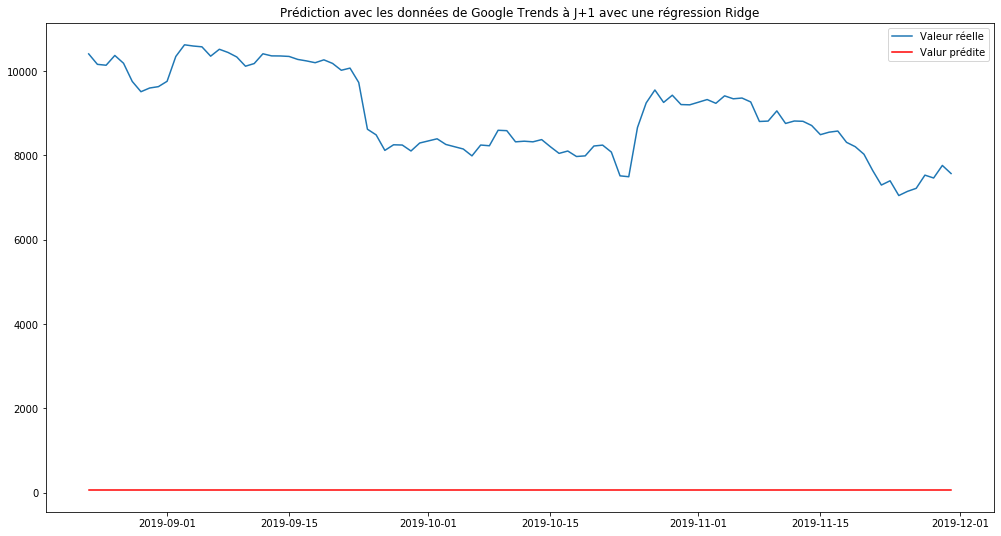

In [0]:
# On affiche les deux courbes pour comparer
plt.figure(figsize=(17, 9))
plt.plot(df_result.index, df_result['BTC_Close_Reel'], label='Valeur réelle')
plt.plot(df_result.index, df_result['BTC_Close_Pred'], color='r', label='Valur prédite')
plt.title('Prédiction avec les données de Google Trends à J+1 avec une régression Ridge')
plt.legend()
plt.show()